# **Beginner Data Science Workshop!**

This document is to be a resource throughout the entire semester as you develop your project.

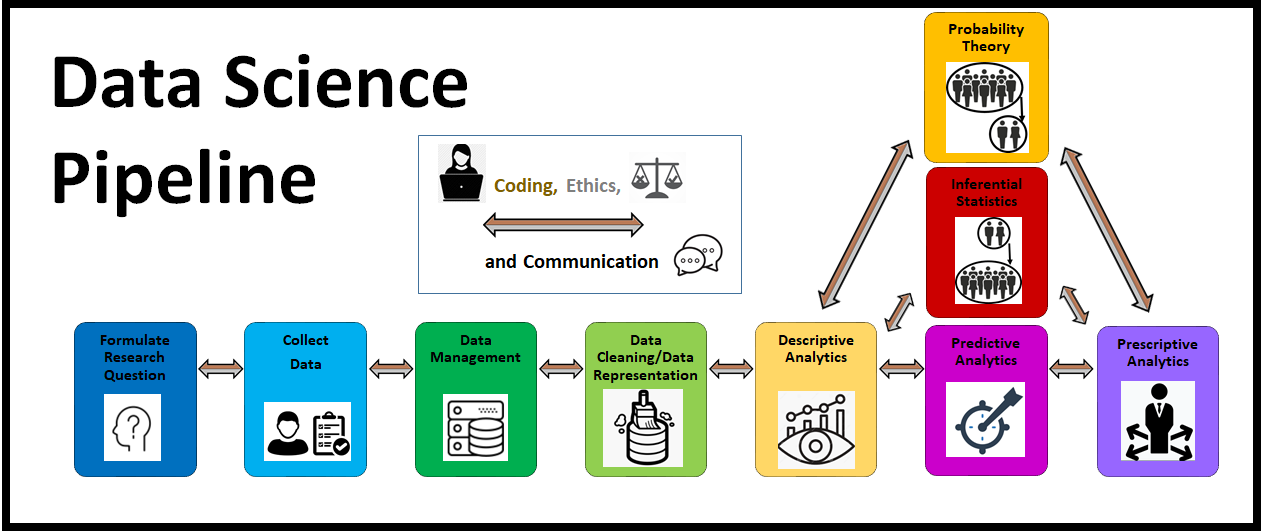

# Research Question
Can we predict the average GPA in a course based on characteristics of the course, such as year, subject, and term? 

(This is not a great question because we can already calculate the average GPA, so we don't need to predict it. But let's try and find out anyways.)

## Data Collection

For our purpose we are using the GPA dataset from Professor Wade Fagen-Ulmschnieder. Prof Wade has already collected the data for us from official UIUC sources and provided it in a csv file. Here is the link to the website where it is hosted: https://waf.cs.illinois.edu/discovery/gpa.csv

In [ ]:
import pandas as pd

df = ...
df.head()

Each row in this dataset is a class section, and each column contains attributes of this class section.

First, lets go through the basic steps to check what kind of missing values the dataset could potentially have.

When displaying the dataset, it doesn't seem like there any datapoints which could potentially mess up our data modeling, but let's dig a little deeper.

In [ ]:
df = pd.read_csv("https://waf.cs.illinois.edu/discovery/gpa.csv")
df


# Data Cleaning
In order to effectively eliminate all values that could mess with our modeling, we go through the dataset to see if we find any null or Nan values. We can then go about removing them from the dataset so that there are no missing values to confuse the model during the training period.

In [ ]:
na_vals = ...
na_vals

In [ ]:
na_vals['Sched Type']/len(df)

14% of the 'Sched Type' column is an NaN value! We could consider removing this column entirely, but it's possible that an online class is generally easier than an in-person class or vice versa. Instead, let's drop the rows that contain NaN values in this column. We will remove the 'Primary Instructor' column later, so we don't have to worry about those values. 

In [ ]:
df_clean = ...
df_clean.head()

In [ ]:
len(df) - len(df_clean)

In [ ]:
...

When we double check, we can see that the correct number of rows were removed. Unfortunately, we still have a problem...

In [ ]:
...

The format of values in the column is not consistent! We have both "ONL" and "Onl", "INT" and "Int".

In [ ]:
df_clean = ...

In [ ]:
df_clean['Sched Type'].unique()

Let's take a look at the Subject column next.

In [ ]:
count = ...
count

In [ ]:
import matplotlib.pyplot as plt

count.plot.bar()

plt.show()

Some subjects have very few classes. It would be difficult to predict their average GPA with such little data. Choosing a threshold value is subjective, so maybe we could try a couple and check the predictions. Looking at the bar graph, it seems like there is a jump around 500.

In [ ]:
subject_list = ...
subject_list.index

In [ ]:
df_filtered = ...

In [ ]:
df_filtered.head()

## Exploratory Data Analysis (EDA)

We performed Exploratory Data Analysis (EDA) and data visualization on a GPA dataset using Python libraries such as pandas, matplotlib, and seaborn. The goal was to uncover patterns, trends, and relationships within the data to gain insights into factors affecting students' GPA, and provide support for modeling.

Remember: EDA is a critical step in any data analysis project. It provides the groundwork for more advanced modeling and hypothesis testing by revealing the data's underlying structure and relationships.

## We plan the following key steps:
1. Data Loading and Initial Exploration
2. Calculating Average GPA
3. Analyzing GPA by Subject
4. Visualizing GPA Distribution
5. Trend Analysis Over Years
6. Comparing Terms
7. Class Size vs. GPA
8. Instructor Impact
9. Course Number Analysis
10. Filtering Specific Courses

## *Why These Matter?*

***Understanding Data:***  *EDA helps in comprehensively understanding the dataset, including its variables and inherent patterns.*

***Identifying Patterns and Outliers:*** *Visualization techniques make it easier to spot trends, correlations, and anomalies that might not be apparent from raw data.*

***Informing Decisions:*** *Insights gained can inform educators, administrators, and policymakers to improve educational strategies and student outcomes.*

In [ ]:
import seaborn as sns

# A list of dataframes

1.   gpa_data
2.   gpa_subject
3.   gpa_year
4.   gpa_student
5.   gpa_instructor
6.   gpa_coursenumber


We read the GPA data from the specified URL and use some simple methods to understand the structure of the dataset.

In [ ]:
gpa_data = pd.read_csv("https://waf.cs.illinois.edu/discovery/gpa.csv")
gpa_data.head(5)

In [ ]:
...

In [ ]:
...

We calculate the average GPA for each course by considering the weighted grades and add this as a new column `avgGPA`. Then, we use the `describe()` method to get a statistical summary of the `avgGPA`.

In [ ]:
gpa_data['avgGPA'] = (gpa_data['A+']*4.0 + gpa_data['A']*4.0 + gpa_data['A-']*3.67 + gpa_data['B+']*3.33 + gpa_data['B']*3.0 + gpa_data['B-']*2.67 + gpa_data['C+']*2.33 + gpa_data['C']*2.0 + gpa_data['C-']*1.67 + gpa_data['D+']*1.33 + gpa_data['D']*1.0 + gpa_data['D-']*0.67 + gpa_data['F']*0.0 + gpa_data['W']*0.0) / gpa_data['Students']
...

We group the data by `Subject`, calculate the mean `avgGPA` for each subject, and display the top 10 subjects with the highest and lowest average GPA.

In [ ]:
gpa_subject = ...
display(gpa_subject.nlargest(10, 'avgGPA'))
display(gpa_subject.nsmallest(10, 'avgGPA'))

We plot a histogram of the average GPA (`avgGPA`) to visualize its distribution across all courses.

In [ ]:
plt.figure(figsize=(10, 6))
...
plt.xlabel('Average GPA')
plt.ylabel('Frequency')
plt.title('Average GPA Distribution')
plt.show()

## *How do we interpret visualizations?*

This histogram displays the distribution of the average GPA across all courses, with the average GPA on the x-axis and the frequency (number of courses) on the y-axis.
Think of:

* Right-Skewed Distribution?
* Mode at High GPA?
* Grade "inflation" might be present?

This type of visualization can help identify the overall grading trends within a dataset and prompt further investigation into potential biases or patterns in grading across different subjects or instructors.



Then, we group the data by `Year`, calculate the mean `avgGPA` for each year, and plot a line chart to observe the trend of average GPA over the years.

In [ ]:
# Plot a line chart using 'Year' as the x-axis and 'avgGPA' as the y-axis from the DataFrame 'df_year'
...
plt.figure(figsize=(10, 6))
...
plt.xlabel('Year')
plt.ylabel('Average GPA')
plt.title('Average GPA by Year')
plt.show()

## *Line Chart*



* The average GPA shows a steady increase from 2010 to 2024.
* There is a notable spike in GPA between 2018 and 2020, followed by a dip around 2021.
* A sharp rise occurs post-2021, with a significant surge in GPA after 2020.
Fluctuations are observed around 2020, likely due to temporary changes or external factors.
* The overall trend suggests improvement in GPA over time, possibly influenced by grade inflation, changing grading policies, or the effects of remote learning during the pandemic.

We generate a boxplot to compare the distribution of average GPA across different terms (`Term`).

In [ ]:
# Generate the boxplot for 'Term' vs 'avgGPA'
plt.figure(figsize=(10, 6))
...
plt.title('Boxplot of Average GPA by Term')
plt.suptitle('')  # Suppress the automatic subplot title
plt.xlabel('Average GPA')
plt.ylabel('Term')
plt.tight_layout()

plt.show()


## *Boxplot*

* Similar Median GPAs: All terms have a median GPA around 3.5, indicating consistently high performance across terms.
* Broader Spread in Winter and Fall: These terms show a wider GPA range, from 2.5 to 4.0, compared to Spring and Summer.
* Narrower Spread in Spring and Summer: GPAs are more concentrated between 3.0 and 4.0 during these terms.
* Outliers Present: Outliers exist in all terms, especially in Spring and Summer, where some courses have GPAs below 2.0.
* General Consistency: Most courses, regardless of term, have average GPAs clustered between 3.0 and 4.0, showing overall consistency in student performance across terms.

We analyze the relationship between the number of students (`Students`) and the average GPA (`avgGPA`) by creating a scatter plot.

In [ ]:
gpa_student = gpa_data[['Students','avgGPA']]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

...
axes[0].set_xlabel('Number of Students')
axes[0].set_ylabel('Average GPA')
axes[0].set_title('Average GPA by Number of Students')
...
axes[1].set_xlabel('Number of Students')
axes[1].set_ylabel('Average GPA')
axes[1].set_xlim(0, 500)
axes[1].set_title('Average GPA by Number of Students')
plt.show()

## *Scatter plot*

* High Concentration of Small Classes: Most data points are clustered on the left side, showing that the majority of courses have fewer than 250 students.
* Higher GPAs in Smaller Classes: For classes with fewer students (below 250), average GPAs are often higher, clustering around 3.5 to 4.0.
* More Spread in Larger Classes: As the number of students increases, there is more variation in GPA, with courses showing GPAs from 2.0 to 4.0 in classes with more than 250 students.
* No Clear Trend for Large Classes: Beyond 250 students, the relationship between the number of students and GPA becomes less defined, with GPAs distributed across a wide range.
* Overall Pattern: Smaller classes tend to have higher and more consistent GPAs, while larger classes show greater variability in student performance.

We group the data by `Primary Instructor`, calculate the mean `avgGPA` for each instructor, and display the top 10 instructors with the highest and lowest average GPA.

In [ ]:
gpa_instructor = ...
display(gpa_instructor.nlargest(10, 'avgGPA'))
display(gpa_instructor.nsmallest(10, 'avgGPA'))

We explore the relationship between course numbers (`Number`) and average GPA by plotting a scatter plot.

In [ ]:
gpa_coursenumber = ...
sns.scatterplot(x='Number', y='avgGPA', data=gpa_coursenumber, marker = 'o', s=25)
plt.xlabel('Course Number')
plt.ylabel('Average GPA')
plt.title('Average GPA by Course Number')
plt.show()

## *What do you find in the scatter plot?*

* When course number increases to **500+**, what happens?
* What are **600+** courses?
* Around **800**?
* course number around **0** ??



Let's explore the course whose number is around 0.

We filter the dataset to include only courses with a course number less than 20 to figure out the courses with the lowest GPAs.

In [ ]:
...

Through these steps, we performed exploratory data analysis and visualization on the GPA dataset, gaining insights into how the average GPA varies across different subjects, years, terms, class sizes, instructors, and course numbers.

## Tips for Beginners

**Start with Simple Visuals**: Begin with basic plots like histograms and scatter plots before moving to complex visualizations.

**Clean and Prepare Data**: Ensure data is clean and properly formatted to avoid errors in analysis.

**Ask Questions**: Let your analysis be driven by questions such as "Does class size affect GPA?" or "Which subjects have the highest average GPA?"

**Interpret Results Carefully**: Correlation does not imply causation; be cautious in drawing conclusions.

**Practice Regularly**: EDA skills improve with practice; analyze different datasets to become proficient.

# Modeling with Linear Regression
In this case, since we want to predict the average GPA, which is a numerical variable, it makes sense to use linear regression. We also must assume that the relationship between the **explanatory variables (features)** and the **response (target)** is linear. If not, we would have to use a different model. Always check the model assumptions to make sure you're using the right model for your data!

In [ ]:
df_filtered['avgGPA'] = (df_filtered['A+']*4.0 + df_filtered['A']*4.0 + df_filtered['A-']*3.67 + df_filtered['B+']*3.33 + df_filtered['B']*3.0 + df_filtered['B-']*2.67 + df_filtered['C+']*2.33 + df_filtered['C']*2.0 + df_filtered['C-']*1.67 + df_filtered['D+']*1.33 + df_filtered['D']*1.0 + df_filtered['D-']*0.67 + df_filtered['F']*0.0 + df_filtered['W']*0.0) / df_filtered['Students']


In [ ]:
df_filtered.head()

We will omit the **Primary Instructor** and **Course Title** column, because this will most likely not be helpful in predicting the average GPA, as there is a different instructor and name for almost every course. The **YearTerm** column is not necessary either because we already have that information in **Year** and **Term** columns.

We will also omit the grade columns (**A+, A, A-, B+, ...**) because they are used in the calculation of the average GPA. In your project, you will not be predicting something that can be easily calculated from the data, but this is just an example.

In [ ]:
df_filtered.drop(columns=['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F', 'W', 'YearTerm', 'Course Title', 'Primary Instructor'], inplace=True)

In [ ]:
df_filtered.head()

## Train-Test Split

We will split the dataset into "train" and "test" datasets. We will use the "train" data to build our model and the "test" data to evaluate it. The standard is to use **80%** of your data for training and **20%** for testing.

For a more rigorous approach, you can use **k-folds cross validation** or **leave-one-out cross validation (LOOCV)**, which will ensure that your evaluation metrics are not based on chance.

We will rename the **Sched Type** column so we can use the statsmodels api.

In [ ]:
from sklearn.model_selection import train_test_split

...

df_train, df_test = train_test_split(df_filtered, test_size=0.2, random_state=8)

## Tuning Parameters
In order to prevent overfitting of the model, we will check for **multicolinearity**. You don't want to fit your model to the noise in the data, so choose your parameters carefully. Looking at the correlation matrix below, it seems like none of the explanatory variables have a high correlation with each other, so we don't need to consider dropping any of them.

In [ ]:
...

## Model

There are multiple packages you can use for linear regression. In this notebook, we will use **statsmodels**. sklearn is also a popular choice.

In [ ]:
import statsmodels.formula.api as smf

model = ...
model.summary().tables[0]

## Evaluation
There are many different evaluation metrics you can use. For linear regression, two popular metrics are the **RMSE** and **R^2**.

The RMSE is a metric that represents the average residuals in the same unit as the response variable, which makes it easy to interpret. The lower the RMSE (comparitively to your response variable), the better the model fit.

The R^2 is a metric that expresses how much of the variability of the response variable is explained by the model. This number ranges from (-infinity, 1] for a dataset that did not train the model.The higher the R^2, the better the fit.

Here are some of the metrics that the sklearn package offers: https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

y_test = df_test['avgGPA']
y_predict = model.predict(df_test)
rmse = ...
print("rmse:", rmse)
r2 = ...
print("r2:", r2)

rmse: 0.3331889246223098
r2: 0.32326809519855326

In [ ]:
print(df_test['avgGPA'].max())
print(df_test['avgGPA'].min())

We have a fairly poor RMSE, as it is large compared to the range of the average GPA's. Our R^2 is also poor because it is closer to 0 than 1. (The R^2 is usually above 0. If not, something is very wrong with your model.)


# Now try it yourself!

In [ ]:
# which professor has taught the most classes? 
...

In [ ]:
# create one visualization different from those already in the notebook
...

In [ ]:
# what is another variable (not in the dataset) that you think would be helpful in predicting average GPA?
# ...